In [1]:
#import matplotlib 3d plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[[ 2.71462851  2.39385801  2.00843922 ... -2.00843922 -2.39385801
  -2.71462851]
 [ 2.44219134  2.05722686  1.62364463 ... -1.62364463 -2.05722686
  -2.44219134]
 [ 2.09084058  1.65674689  1.19048878 ... -1.19048878 -1.65674689
  -2.09084058]
 ...
 [ 2.15380637  1.72672945  1.26476982 ... -1.26476982 -1.72672945
  -2.15380637]
 [ 2.49285311  2.11748102  1.69080009 ... -1.69080009 -2.11748102
  -2.49285311]
 [ 2.75134924  2.44251371  2.06646883 ... -2.06646883 -2.44251371
  -2.75134924]]


<IPython.core.display.Javascript object>


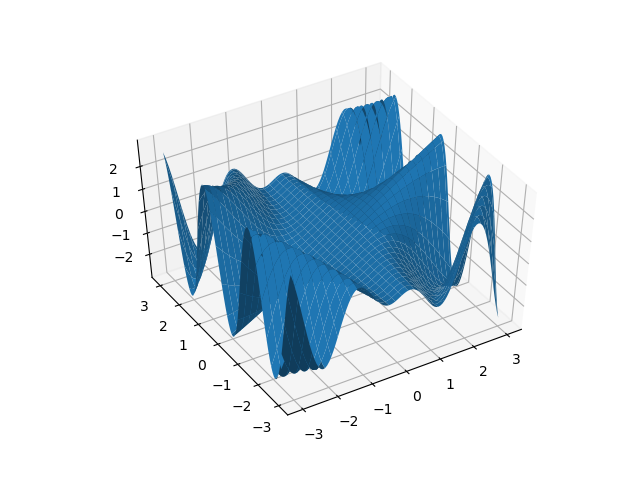

In [45]:
%matplotlib notebook
import numpy as np
#computing the numerical gradient of sin(xy)
#
#define a grid of points

#h = 0.001#step
#xs = -1 + np.array(range(0,(int)(1/h))) * 2 * h
#ys = -1 + np.array(range(0,(int)(1/h))) * 2 * h
nrpts = 101
xs = np.linspace(-3, 3, num = nrpts)
ys = np.linspace(-3, 3, num = nrpts)
xs = xs.reshape( (nrpts,1) )
ys = ys.reshape( (1, nrpts) )
h = 1. / nrpts

gradx = (np.sin( (xs +h).dot(ys) ) - np.sin( xs.dot(ys) ) ) / h 
grady = (np.sin( xs.dot( ys +h) ) - np.sin( xs.dot(ys) ) ) / h

print(gradx)
#compare with analytic gradient
agradx = np.cos(xs.dot(ys))
for i in range((int)(nrpts)):
    agradx[:,i] = agradx[:,i] * ys[0,i]   
agrady = np.cos(xs.dot(ys))
#for i in range((int)(1/h)):

xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
#plotting the x component of the gradient
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xsf, ysf, gradx)
plt.show()

<IPython.core.display.Javascript object>


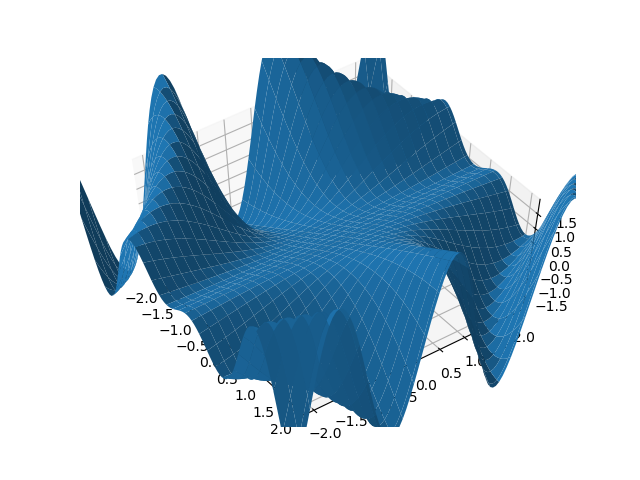

In [15]:
#compare with symbolic derivative
grid = np.meshgrid(xs, ys)
symb = ysf * np.cos(grid)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xsf, ysf, gradx)
plt.show()

<IPython.core.display.Javascript object>


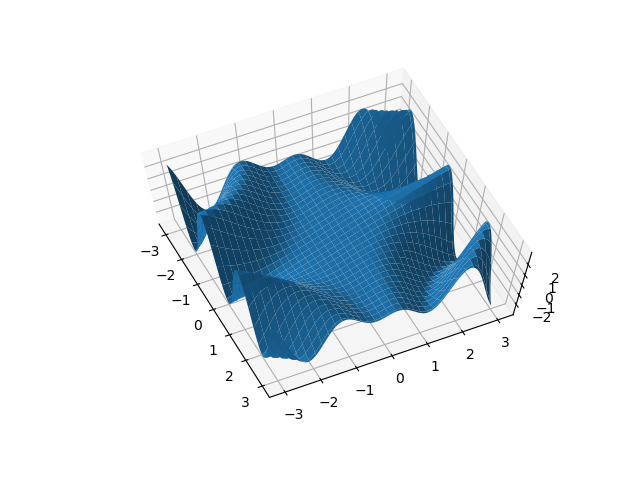

In [16]:
#plotting the y component of the gradient
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xsf, ysf, grady)
plt.show()

<IPython.core.display.Javascript object>


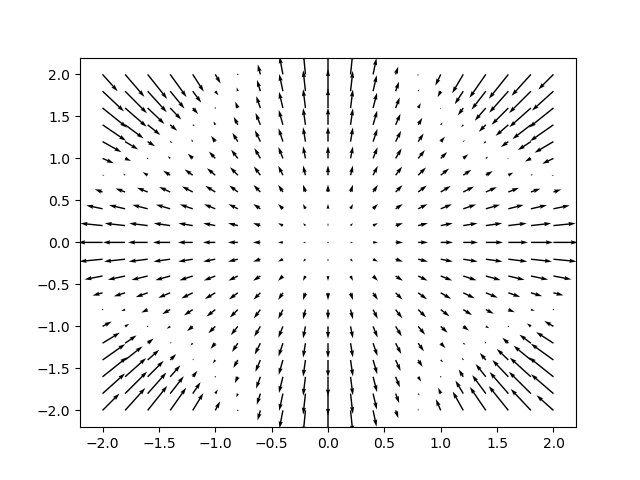

In [25]:
#plotting gradients as vector field
nrpts = 21
xs = np.linspace(-2, 2, num = nrpts)
ys = np.linspace(-2, 2, num = nrpts)
xs = xs.reshape( (nrpts,1) )
ys = ys.reshape( (1, nrpts) )
h = 1. / nrpts

gradx = (np.sin( (xs +h).dot(ys) ) - np.sin( xs.dot(ys) ) ) / h #use list comprehension
grady = (np.sin( xs.dot( ys +h) ) - np.sin( xs.dot(ys) ) ) / h

fig, ax = plt.subplots()
q = ax.quiver(xs, ys, gradx, grady)
#ax.quiverkey(q, X=0.3, Y=1.1, U=10,
#             label='Quiver key, length = 10', labelpos='E')

plt.show()

[[0.5315767  0.61692211 0.69811501 ... 0.6861464  0.60476455 0.51954706]
 [0.61692211 0.69593937 0.7687348  ... 0.75792351 0.68467501 0.60548654]
 [0.69811501 0.7687348  0.83149088 ... 0.82199787 0.75857852 0.68753923]
 ...
 [0.6861464  0.75792351 0.82199787 ... 0.81250487 0.74776723 0.67557062]
 [0.60476455 0.68467501 0.75857852 ... 0.74776723 0.67341065 0.59332899]
 [0.51954706 0.60548654 0.68753923 ... 0.67557062 0.59332899 0.50751742]]


<IPython.core.display.Javascript object>


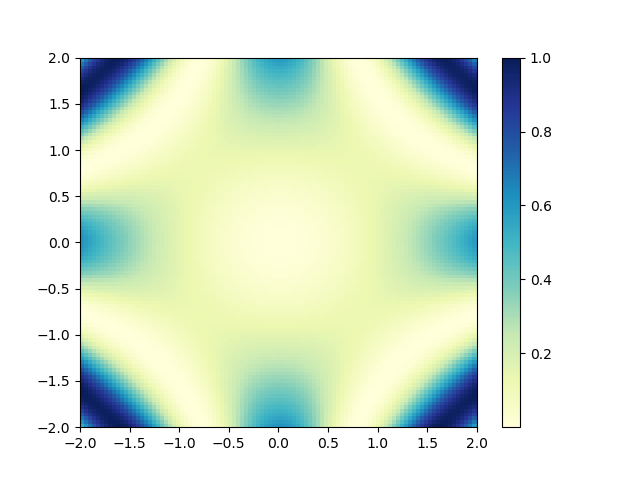

In [41]:
nrpts = 100
xs = np.linspace(-2, 2, num = nrpts)
ys = np.linspace(-2, 2, num = nrpts)
xs = xs.reshape( (nrpts,1) )
ys = ys.reshape( (1, nrpts) )
h = 1. / nrpts

gradx = (np.sin( (xs +h).dot(ys) ) - np.sin( xs.dot(ys) ) ) / h #use list comprehension
grady = (np.sin( xs.dot( ys +h) ) - np.sin( xs.dot(ys) ) ) / h


#plotting the gradient as heat map
#compute heatmap at each point for [gradx, grady]
heatmap = gradx*gradx + grady*grady
heatmap = heatmap / np.max(np.max(heatmap))

print(heatmap)
#'RdBu'
cmap = plt.get_cmap('YlGnBu')
fig, ax = plt.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)
plt.show()

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


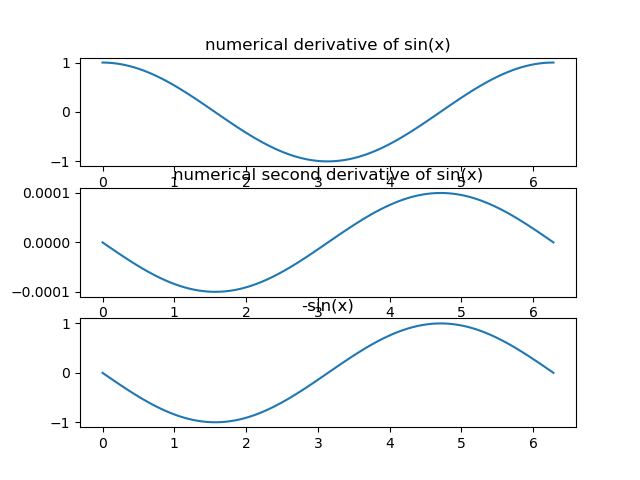

In [44]:
%matplotlib auto
#compute the numerical first and second derivative of sin(x) for a grid of points in the interval [0,2pi] 

#grid of uniformly spaced points
pts = 100
h = 1./pts
xs = np.linspace(0, 2*np.pi, num = pts)
ys = (np.sin(xs+h) - np.sin(xs) ) / h #better call like this, than list comprehension
ys2 = (np.sin(xs+h) - 2*np.sin(xs) + np.sin(xs-h)) / h*h

plt.subplot(3, 1, 1)
plt.title('numerical derivative of sin(x)')
plt.plot(xs, ys)

plt.subplot(3, 1, 2)
plt.title('numerical second derivative of sin(x)')
plt.plot(xs, ys2)

plt.subplot(3, 1, 3)
plt.title('-sin(x)')
plt.plot(xs, -np.sin(xs))

plt.show()